In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pywt

In [2]:
bitcoin = pd.read_csv("hf_bitcoin.csv")
bitcoin = bitcoin.dropna()
bitcoin.Timestamp = bitcoin.Timestamp.astype(pd.Timestamp)

In [3]:
bitcoin['date'] = pd.to_datetime(bitcoin.Timestamp,unit='s')

In [4]:
resampled_series = bitcoin.set_index("date").Close.resample("6H").mean().interpolate()

In [5]:
log_returns = np.log(resampled_series/resampled_series.shift())
abs_log_returns = np.abs(log_returns)
abs_log_returns = abs_log_returns.dropna()
series_length = abs_log_returns.shape[0]

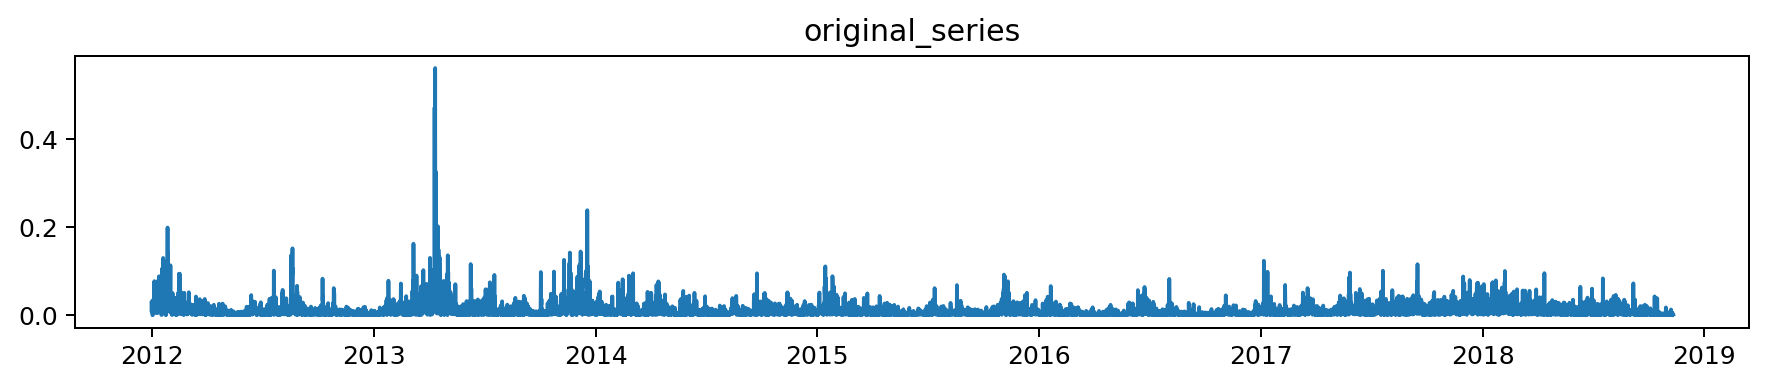

In [6]:
sampling_frequency = 6 #minute 
decompositions = 10
hor_len = 12
vert_len = 2
v_n = abs_log_returns.values
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot(abs_log_returns)
plt.title("original_series")
plt.show()

In [14]:
v, w = pywt.swt(abs_log_returns.values, "haar")[0]

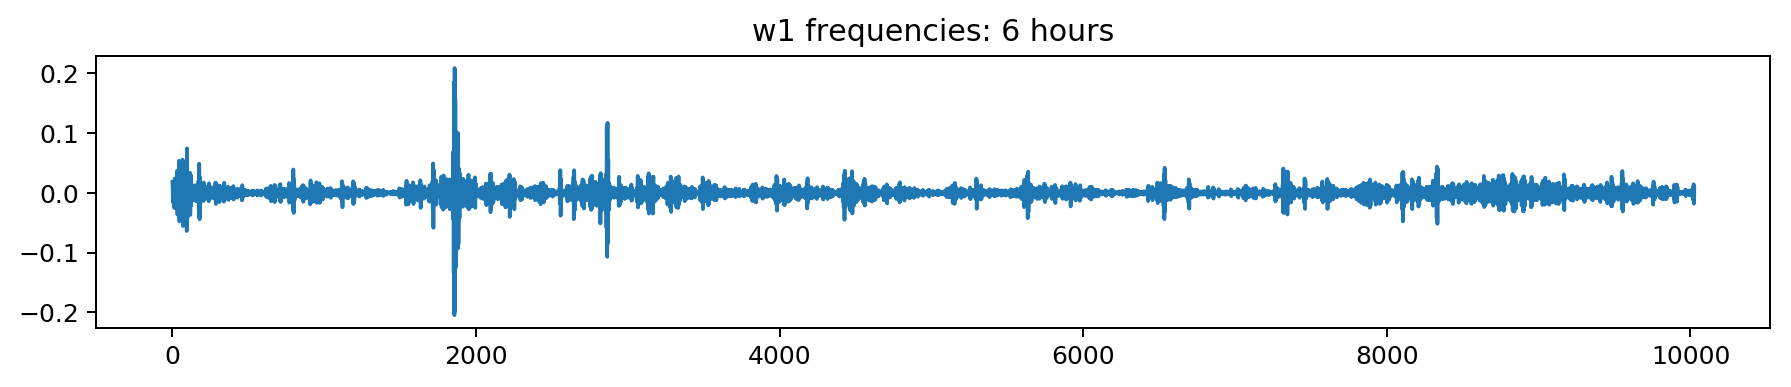

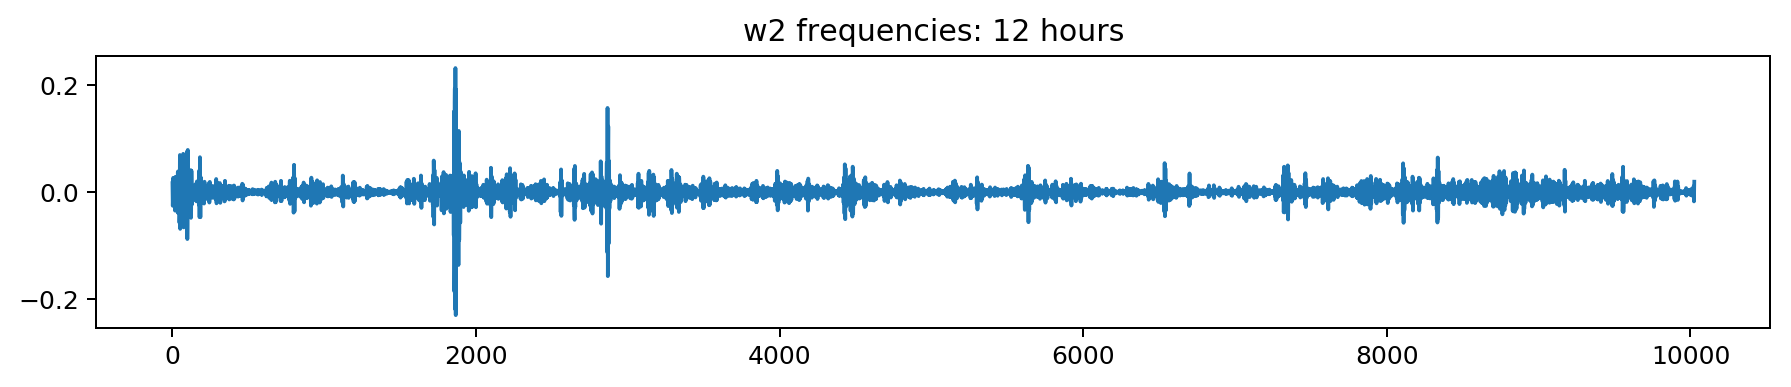

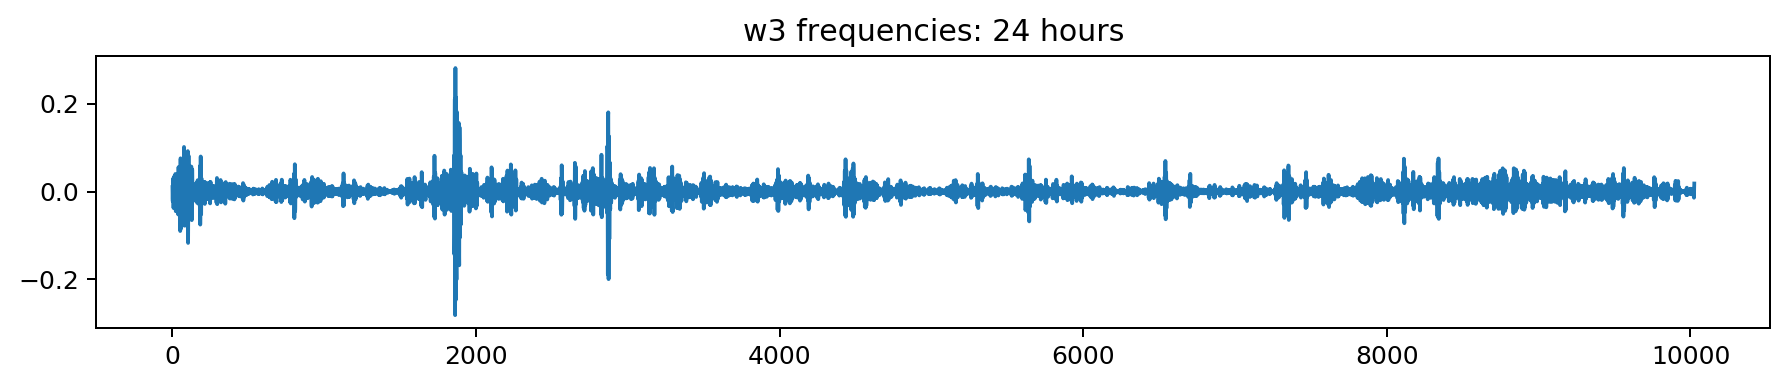

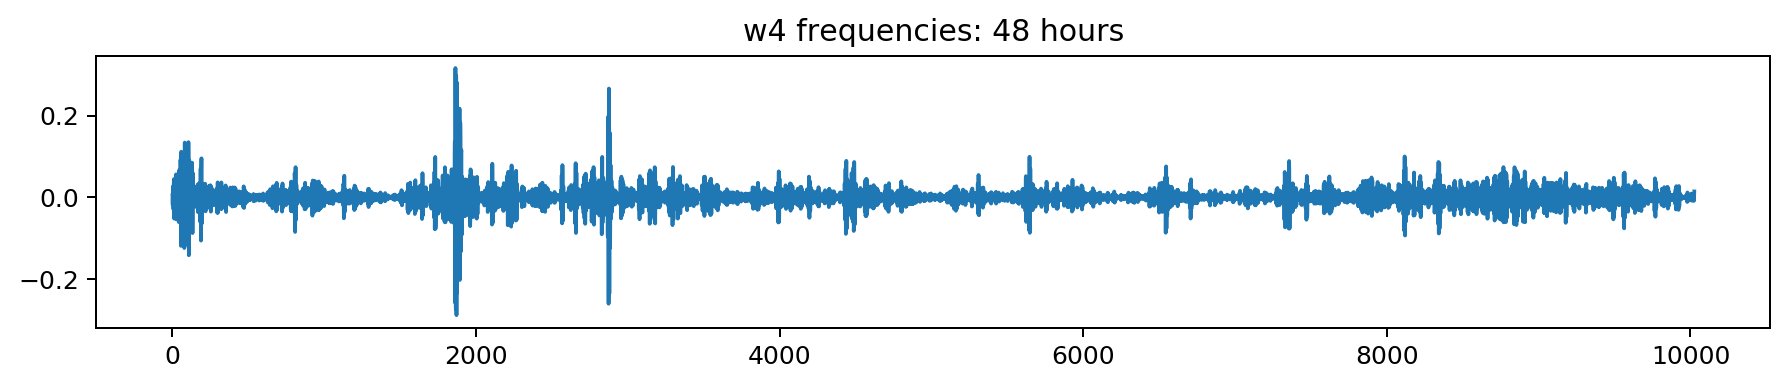

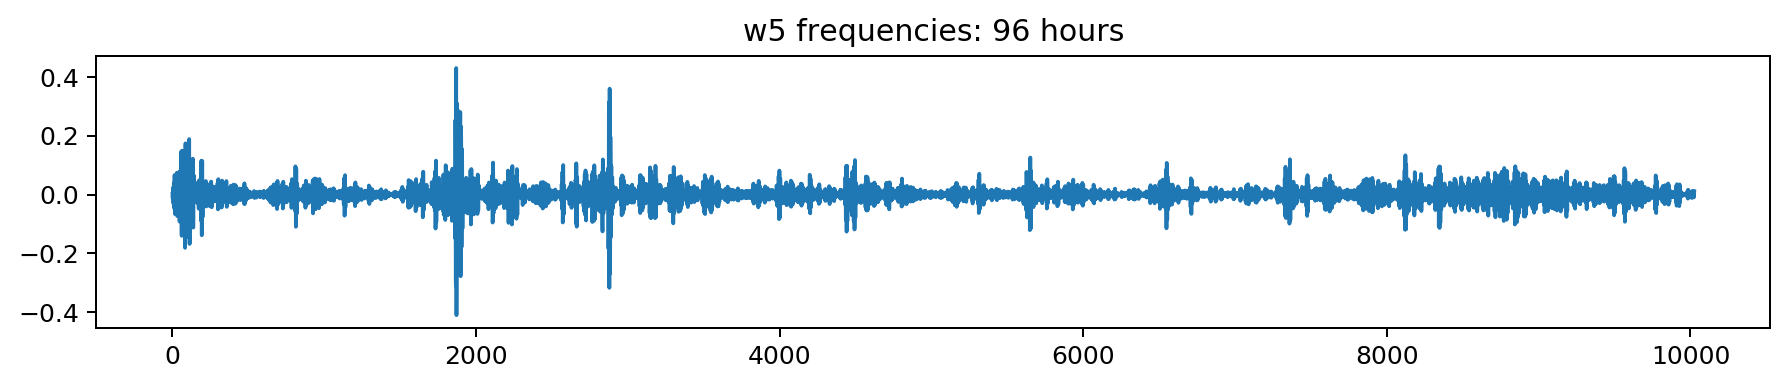

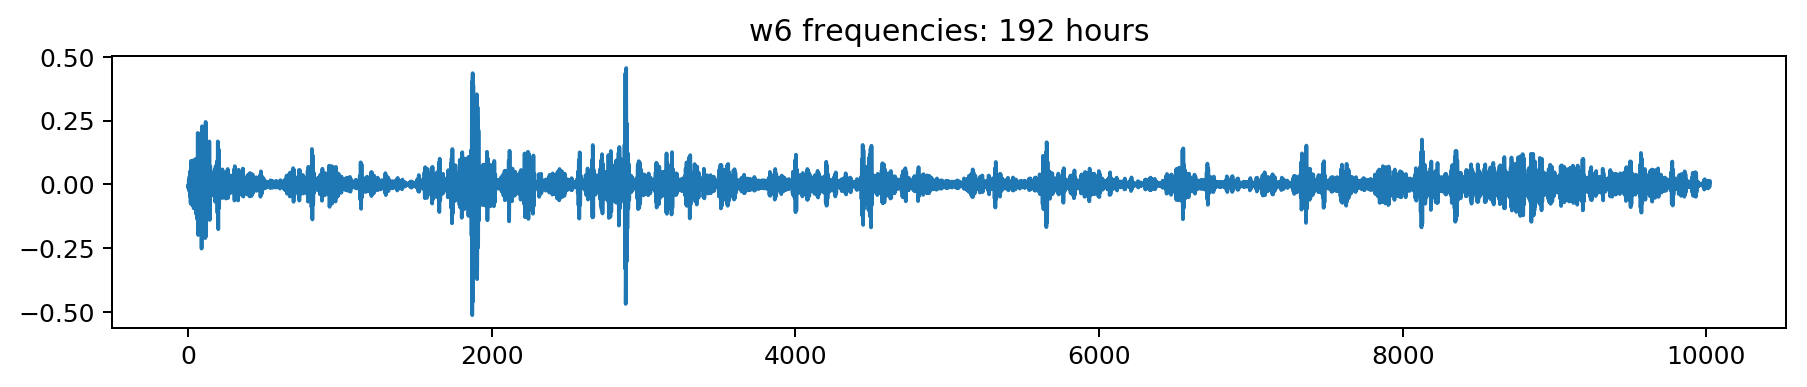

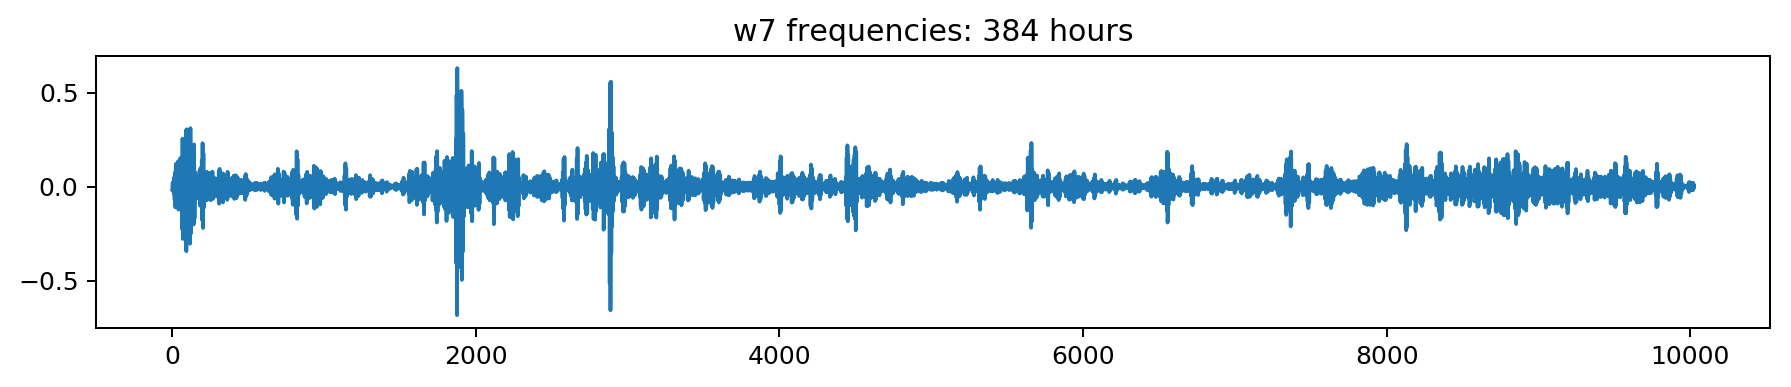

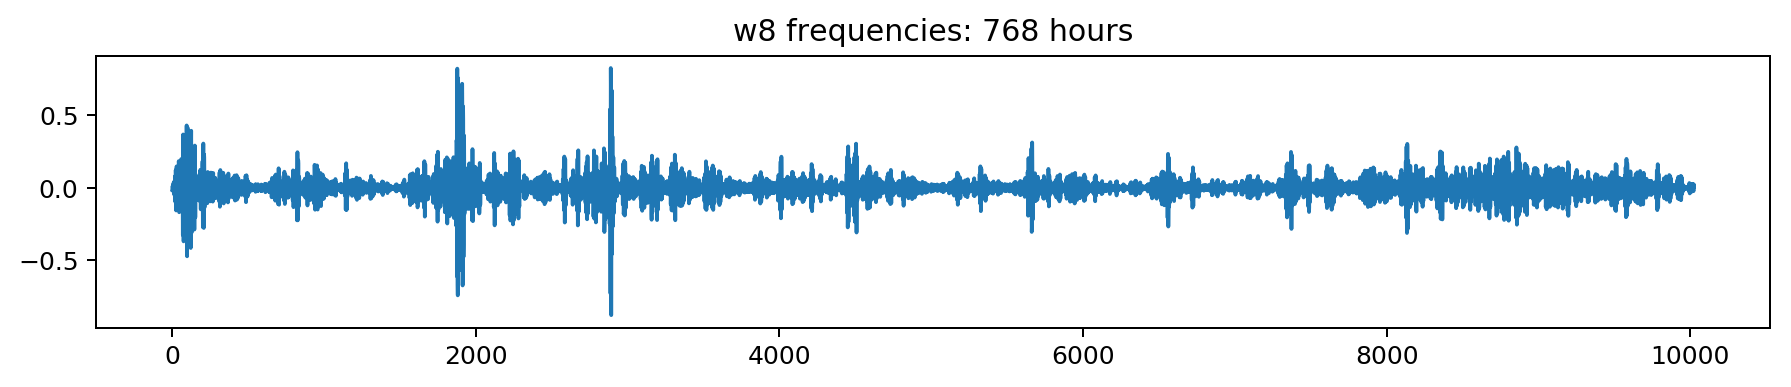

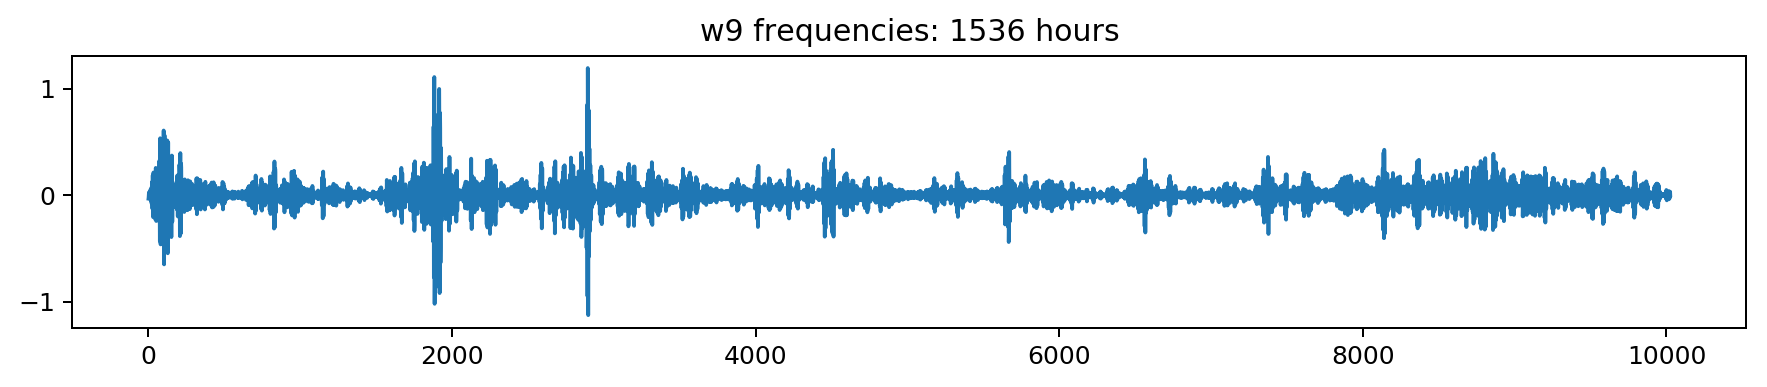

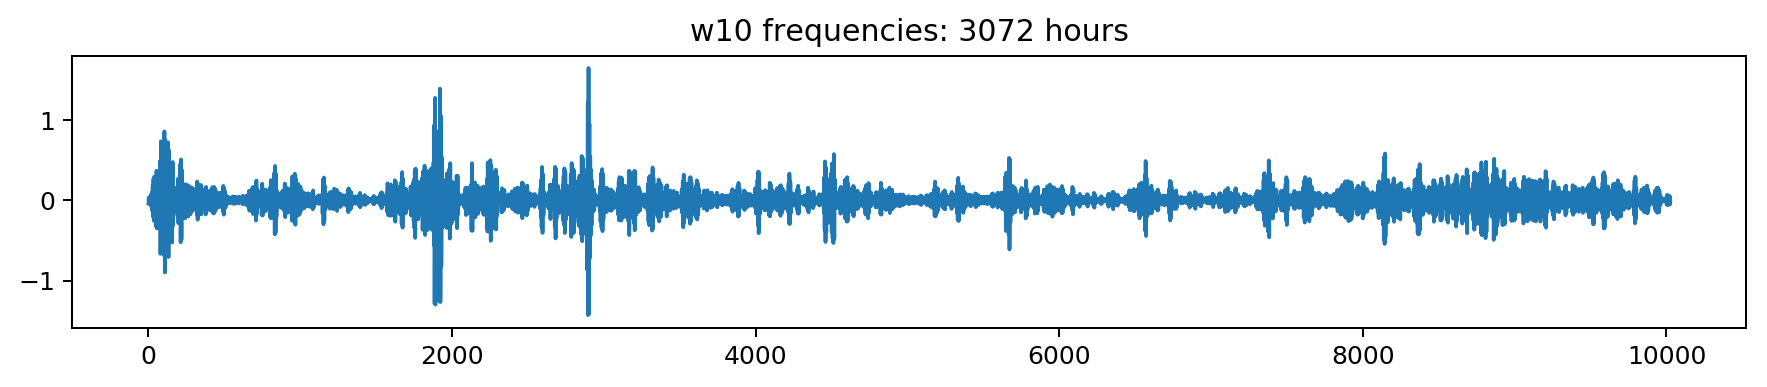

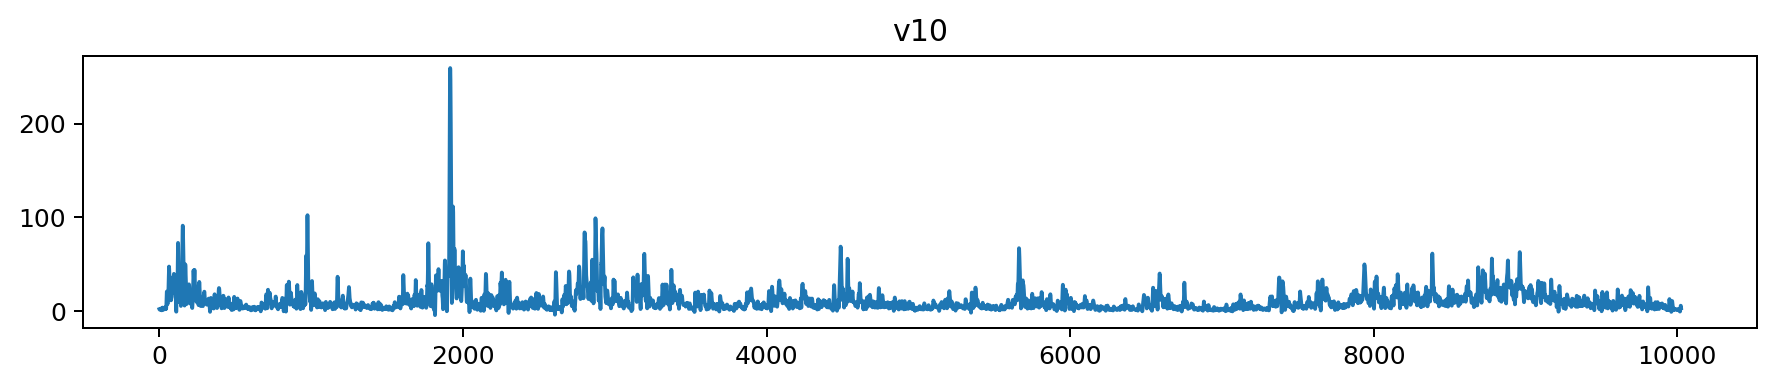

In [16]:

for i in range(decompositions):
    v, w = pywt.swt(v_n, "db8")[0]
   
    v_n = v
    figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
    plt.plot(w)
    plt.title("w"+str(i+1) + " frequencies: "+ str(sampling_frequency*(2**i))+ " hours")
    plt.show()
    
figure(num=None, figsize=(hor_len, vert_len), dpi=180, facecolor='w', edgecolor='k')
plt.plot( v_n)
plt.title("v"+str(i+1))
plt.show()


    